In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.forecasting.theta import ThetaModel

import numpy as np

In [2]:
df = pd.read_csv('TwitterDataset.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df = df.set_index(['Date'])
df = df.resample("7d").mean()
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-11-07,43.243999,45.335999,41.335001,42.790001,42.790001,35349199.60
2013-11-14,42.776000,43.708000,41.406000,42.521999,42.521999,9024932.20
2013-11-21,40.754001,41.572000,39.881999,40.640001,40.640001,8841625.60
2013-11-28,41.287501,42.274999,40.777501,41.852499,41.852499,6835076.50
2013-12-05,47.218001,49.688000,46.418001,48.808000,48.808000,17567980.60
2013-12-12,56.046001,57.980000,54.149999,56.580000,56.580000,28102452.00
2013-12-19,59.944998,63.465000,59.567499,63.000000,63.000000,24337200.25
2013-12-26,66.402499,68.727501,63.260024,65.304999,65.304999,56644127.25
2014-01-02,65.042000,66.758001,63.128400,64.708000,64.708000,29791075.00


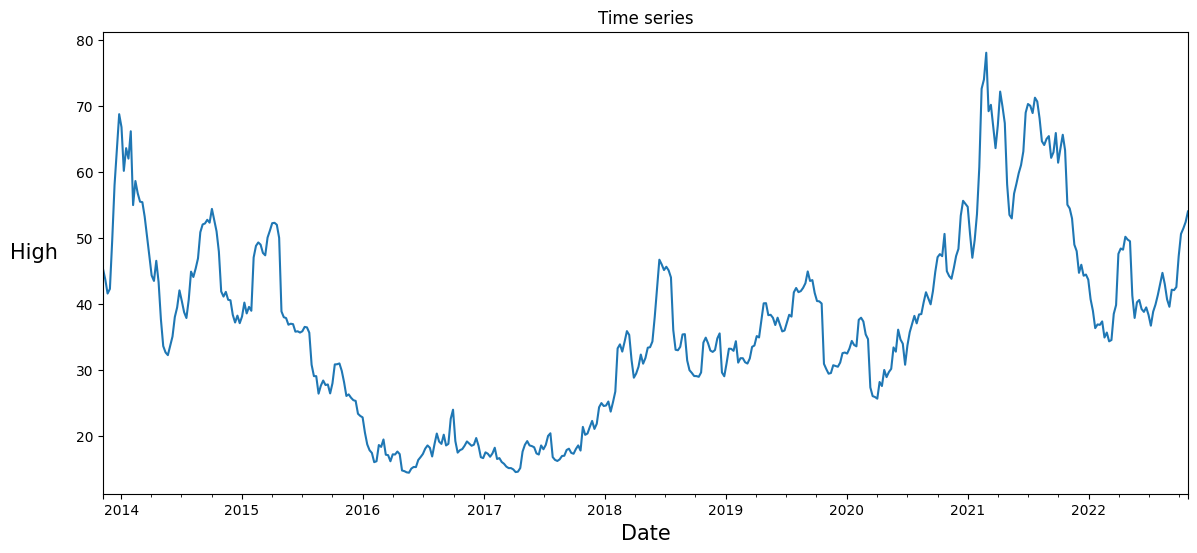

In [3]:
plt.figure(figsize=(14, 6))
plt.title('Time series')
plt.xlabel('Date', fontsize=15)
plt.ylabel('High', rotation=0, labelpad=30, fontsize=15)
df['High'].plot();

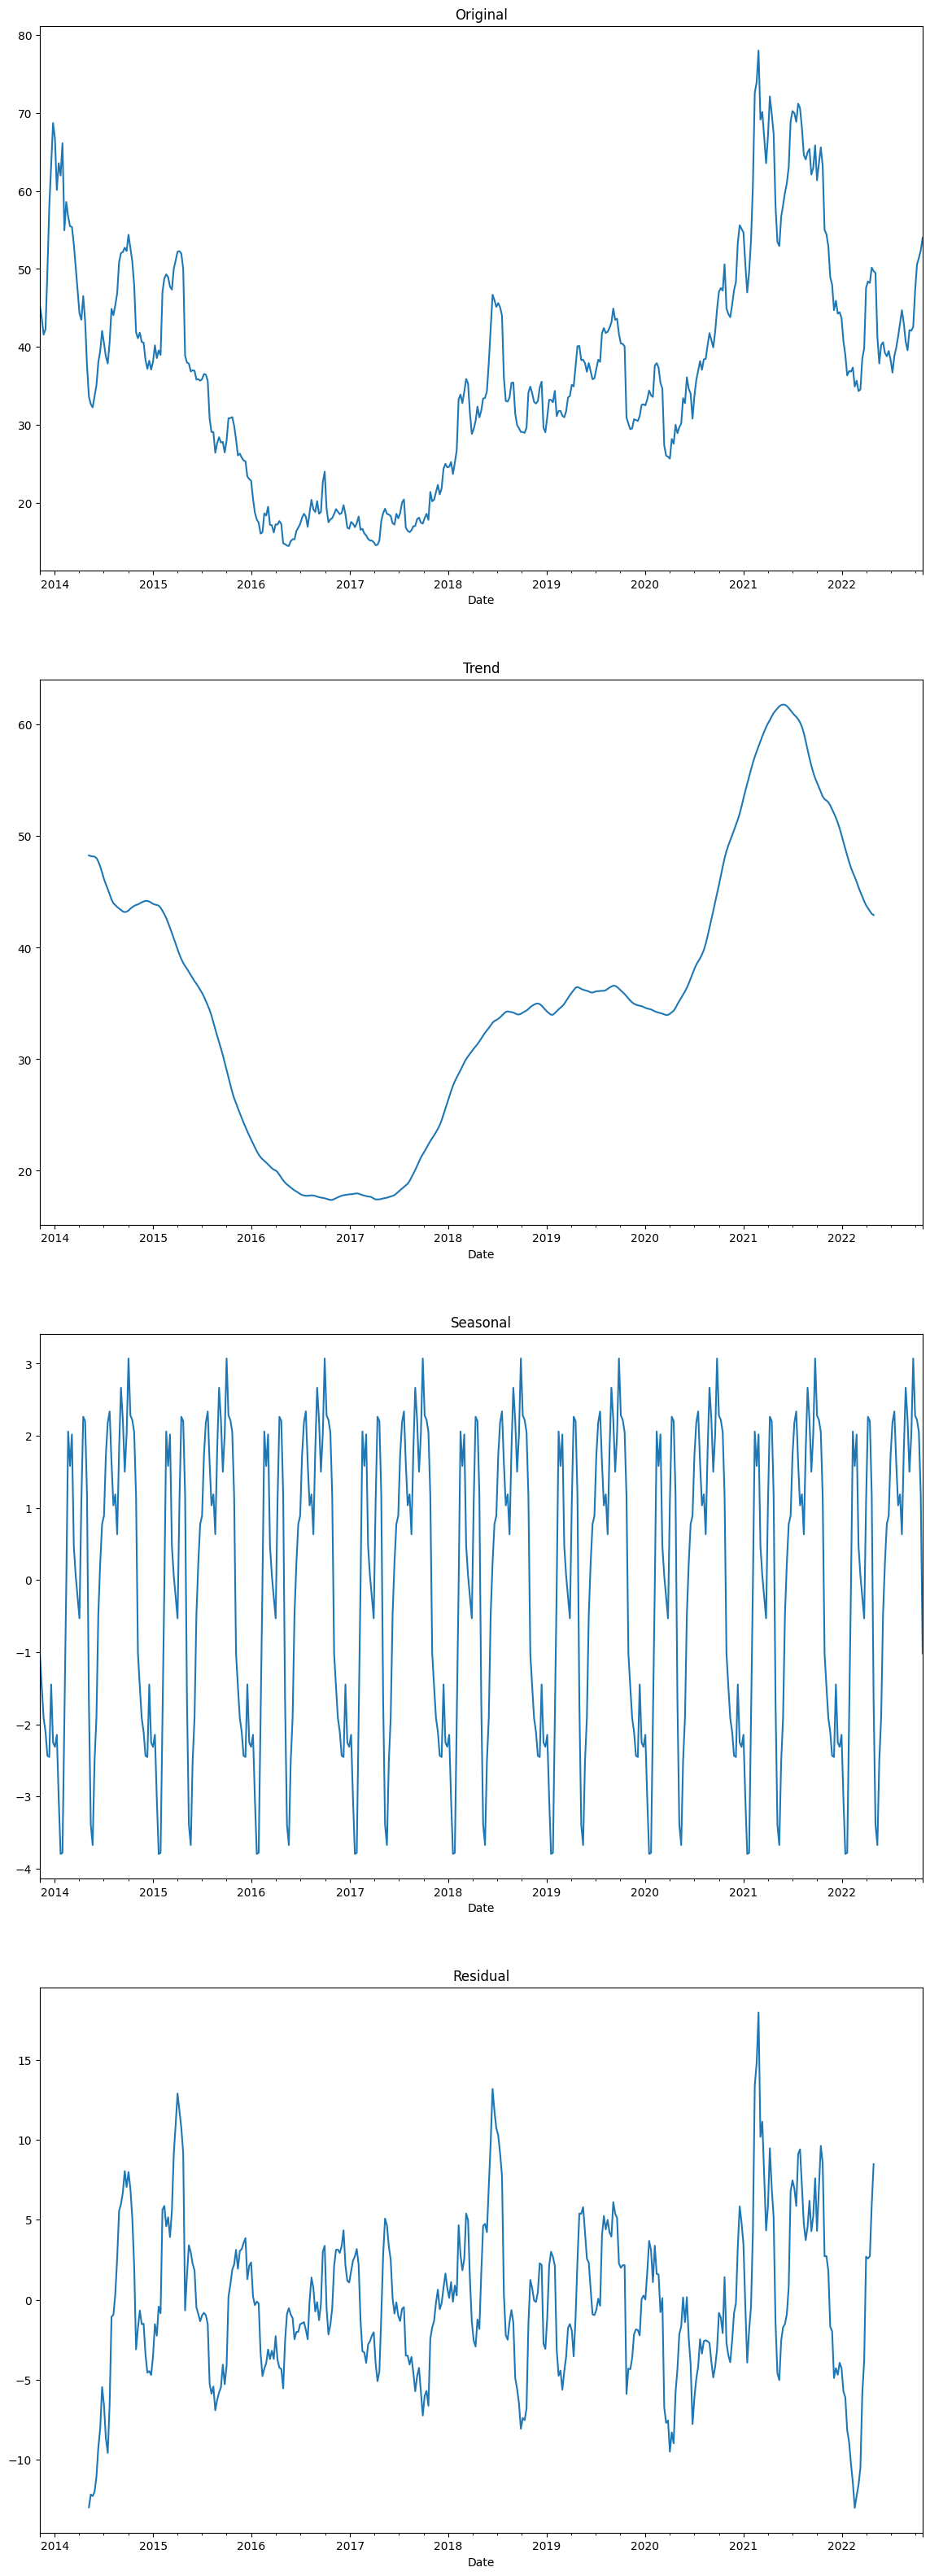

In [4]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(14, 40))
decompose = seasonal_decompose(df[['High']], period=52)

ax[0].set_title('Original')
ax[1].set_title('Trend')
ax[2].set_title('Seasonal')
ax[3].set_title('Residual')

decompose.observed.plot(ax=ax[0])
decompose.trend.plot(ax=ax[1])
decompose.seasonal.plot(ax=ax[2])
decompose.resid.plot(ax=ax[3]);

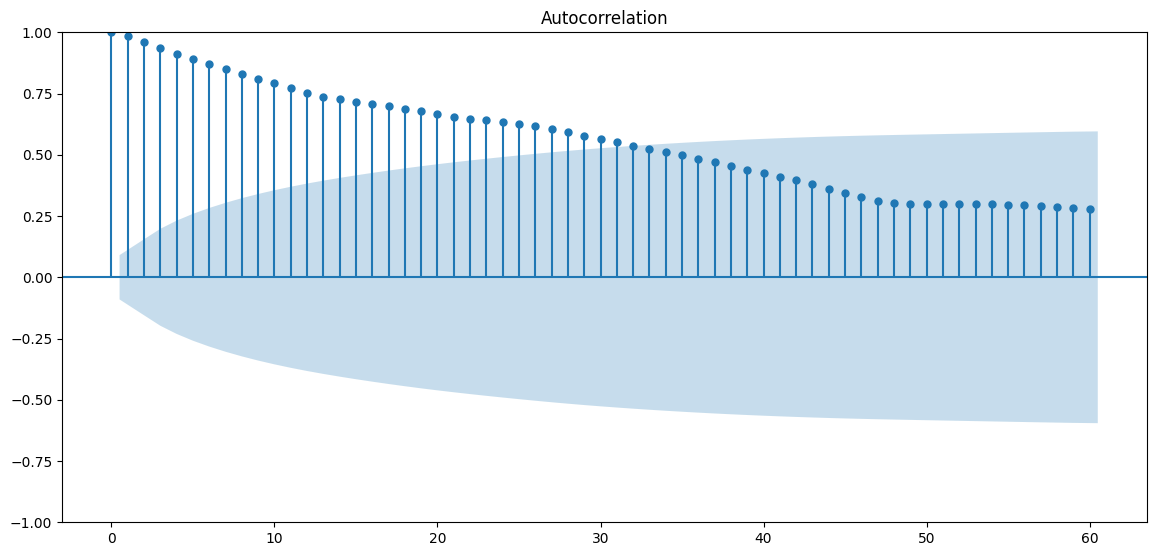

In [5]:
plt.figure(figsize=(14, 14))
ax = plt.subplot(211)
plot_acf(df['High'], lags=60, ax=ax);

In [6]:
p_value = adfuller(df['High'])[1]
p_value

0.1949125643896769

In [7]:
df = df.drop(['Open', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.99015D-01    |proj g|=  3.81269D-01

At iterate    5    f= -1.39005D+00    |proj g|=  1.11907D-02

At iterate   10    f= -1.39105D+00    |proj g|=  4.34914D-04

At iterate   15    f= -1.39108D+00    |proj g|=  4.29066D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     19     23      1     0     0   2.771D-06  -1.391D+00
  F =  -1.3910803697100598     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


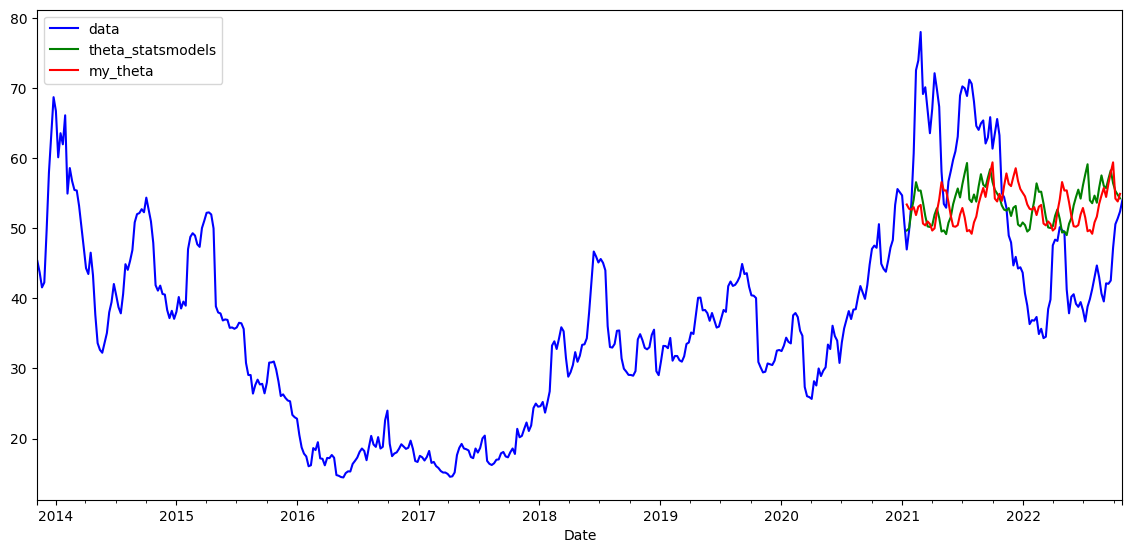

In [10]:
from theta import MyThetaModel

train_size = int(len(df) * 0.8)
predict_size = int(len(df) * 0.2)

plt.figure(figsize=(14, 14))
ax = plt.subplot(211)

model = ThetaModel(np.log(df[:train_size]), period=52, difference=True).fit()
forecast = np.exp(model.forecast(predict_size))

my_model = MyThetaModel(np.log(df[:train_size]), period=52, difference=True).fit()
my_forecast = np.exp(my_model.forecast(predict_size))

df['High'].plot(ax=ax, c='b', label="data")
forecast.plot(ax=ax, c='g', label="theta_statsmodels")
my_forecast.plot(ax=ax, c='r', label="my_theta")
plt.legend()